In [3]:
%matplotlib inline
import numpy as np
from IPython.core.pylabtools import figsize
import matplotlib.pyplot as plt
import scipy.stats as stats
import pymc as pm
import random
from pymc.Matplot import plot as mcplot

 [-----------------100%-----------------] 200000 of 200000 complete in 16.2 secPlotting p_girls
Plotting girls


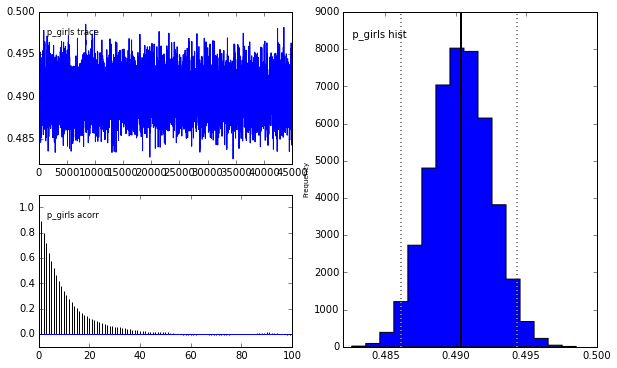

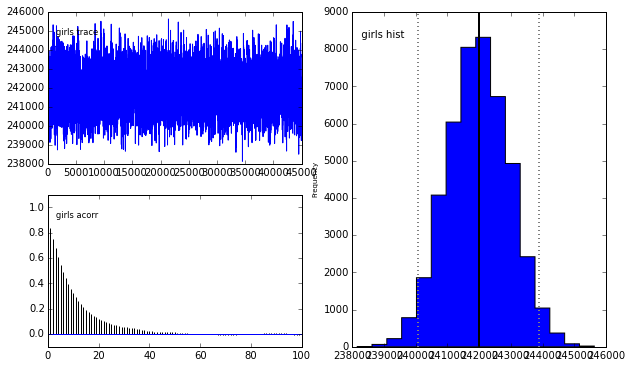

In [21]:
n_girls = 241945
n_boys = 251527

p_girls = pm.Uniform("p_girls", 0., 1.)

girls = pm.Binomial("girls", n=n_girls+n_boys, p=p_girls)
noisy = pm.Normal("noisy", girls, 1./(1000.)**2, value=n_girls, observed=True)

mcmc = pm.MCMC([noisy, girls, p_girls])
mcmc.sample(200000, 20000, thin=4)

mcplot(mcmc)

 [-----------------100%-----------------] 50000 of 50000 complete in 2.1 secPlotting p_b


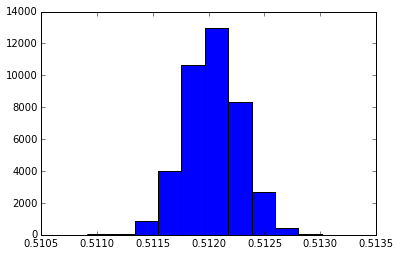

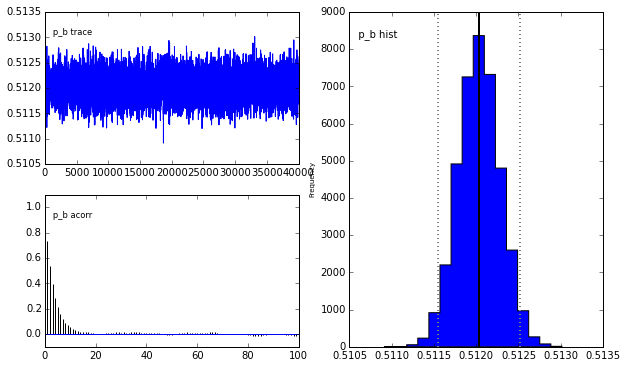

In [19]:
from pymc import *
p_b = Uniform('p_b', 0.0, 1.0)
N_b = Binomial('N_b', n=4138349, p=p_b, value=2118982, observed=True)
m = Model([p_b, N_b])
mc = MCMC(m)
mc.sample(iter=50000,burn=10000)
_ = plt.hist(p_b.trace())
mcplot(mc)

 [-----------------100%-----------------] 200000 of 200000 complete in 21.3 secPlotting p_b
Plotting e_N_b
Plotting e_N


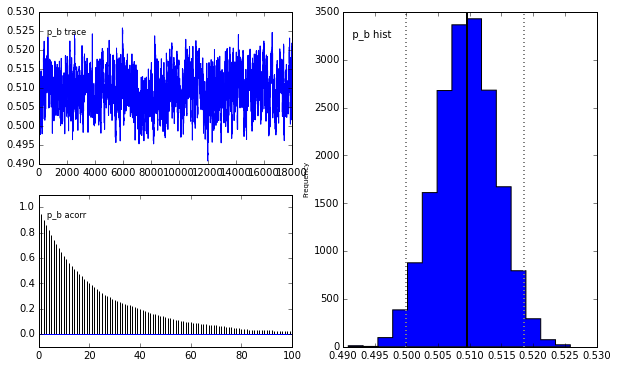

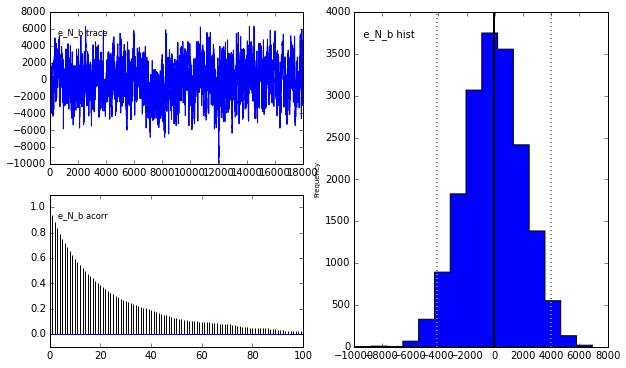

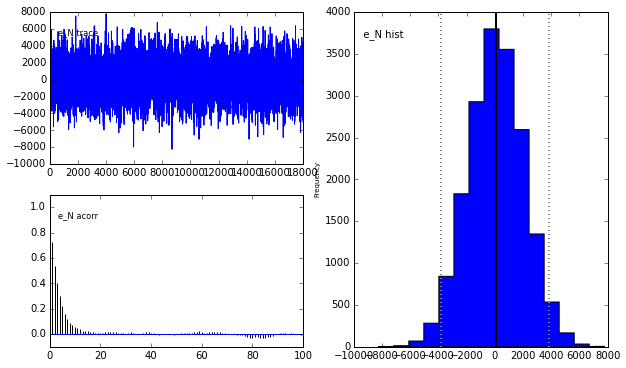

In [22]:
from pymc import *
p_b = Uniform('p_b', 0.0, 1.0)
e_N = Normal('e_N', 0.0, 1.0/(2000.0)**2)
e_N_b = Normal('e_N_b', 0.0, 1.0/(2000.0)**2)
@potential
def likelihood(N_b=251527, e_N_b=e_N_b, N=241945+251527, e_N=e_N, p=p_b):
    return binomial_like(N_b + e_N_b, N + e_N, p)
mc = MCMC([p_b, e_N, e_N_b, likelihood])
mc.sample(200000,20000, thin=10)
mcplot(mc)